# Imports 

In [1]:
import xlrd 
import pandas as pd
import missingno as msno
import plotly.express as px
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
from sklearn import svm
from sklearn.svm import SVR
import math 
from datetime import datetime
from sklearn.neighbors import KNeighborsClassifier
import plotly.graph_objs as go
import plotly.offline as py
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM#, CuDNNLSTM
from keras import optimizers
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


# Functions

In [2]:
def reshape (X):
    myarray=[]
    for i in range (len(X)):
        temp=[X[i]]
        myarray.append(temp)
    return myarray

# Read Data

In [3]:
Trpath=("DS_VF_Task_train.csv")
Tspath=("DS_VF_Task_test.csv")
Train = pd.read_csv(Trpath)
Test  = pd.read_csv(Tspath)

# Show Data

In [4]:
Train.head(10)

,sensor_reading,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691
5,8,1.4691
6,9,1.4691
7,7,1.4691
8,-5,1.4691
9,3,1.4691


In [5]:
Test.head(10)

,sensor_reading
0,-5
1,9
2,22
3,33
4,37
5,41
6,39
7,36
8,26
9,14


# Plots

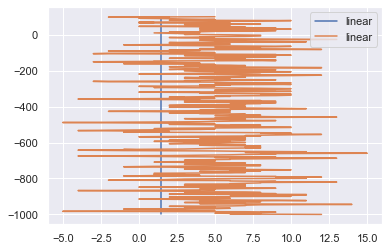

In [6]:
x = np.linspace(-1000, 100, 515)

# Plot the data
plt.plot(Train["time_to_failure"][0:515], x, label='linear')
plt.plot(Train["sensor_reading"][0:515], x, label='linear')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [7]:
#plt.figure(figsize = (18,9))
#plt.plot(range(Train.shape[0]),Train["time_to_failure"],color='b',label='True')
#plt.plot(range(window_size,N),Train["sensor_reading"],color='orange',label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
#plt.xlabel('Date')
#plt.ylabel('Mid Price')
#plt.legend(fontsize=18)
#plt.show()

# Slice Data

In [8]:
X=Train["time_to_failure"][0:1000]
Y=Train["sensor_reading"][0:1000]

# Reshape Data 

In [9]:
TX=np.array(reshape(X))
TY=np.array(reshape(Y))
TesT=np.array(reshape(Test['sensor_reading'][0:515]))

In [10]:
print(TesT)

[[ -5]
 [  9]
 [ 22]
 [ 33]
 [ 37]
 [ 41]
 [ 39]
 [ 36]
 [ 26]
 [ 14]
 [  0]
 [-16]
 [-28]
 [-26]
 [-27]
 [-17]
 [ -9]
 [ -1]
 [ 11]
 [ 16]
 [ 28]
 [ 33]
 [ 31]
 [ 27]
 [ 22]
 [ 20]
 [ 19]
 [  7]
 [  5]
 [  6]
 [  1]
 [ -5]
 [  2]
 [  2]
 [  4]
 [  3]
 [-10]
 [-10]
 [-16]
 [-12]
 [ -6]
 [ -8]
 [-11]
 [ -3]
 [ -2]
 [  6]
 [  7]
 [  2]
 [  2]
 [  9]
 [ -1]
 [  4]
 [  6]
 [  9]
 [ 13]
 [ 10]
 [ 16]
 [ 22]
 [ 23]
 [ 25]
 [ 23]
 [ 17]
 [ 11]
 [ -1]
 [ -2]
 [-10]
 [-21]
 [-20]
 [-16]
 [ -6]
 [  6]
 [ 10]
 [ 14]
 [ 23]
 [ 27]
 [ 28]
 [ 24]
 [ 15]
 [  2]
 [ -4]
 [-13]
 [-21]
 [-22]
 [-18]
 [-12]
 [ -2]
 [  9]
 [ 15]
 [ 18]
 [ 22]
 [ 20]
 [ 14]
 [  9]
 [  5]
 [ -3]
 [-11]
 [-16]
 [-14]
 [ -9]
 [ -6]
 [  3]
 [ 17]
 [ 16]
 [ 18]
 [ 18]
 [ 21]
 [ 16]
 [  8]
 [  5]
 [ -5]
 [-10]
 [-11]
 [-16]
 [-14]
 [ -6]
 [  0]
 [ 12]
 [ 20]
 [ 33]
 [ 43]
 [ 44]
 [ 42]
 [ 27]
 [ 12]
 [  4]
 [ -9]
 [-19]
 [-21]
 [-29]
 [-29]
 [-27]
 [-22]
 [ -9]
 [  3]
 [ 14]
 [ 17]
 [ 25]
 [ 23]
 [ 17]
 [ 13]
 [  3]
 [ -4]
 [ -1]

# Apply ML Model

In [11]:
#X_train, X_test, y_train, y_test = train_test_split(TX, TY, test_size=0.2, random_state=123)

In [26]:
model = XGBClassifier()
model.fit(TX, TY)
# make predictions for test data

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [28]:
y_pred = model.predict(TesT)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(TesT, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 4.66%
